# Testing DRPredICT Datasets

**Authorship:**
Kivil Ozturk, *03/29/2022*
***
**Description:**
Notebook for testing out modules for testing Multiomic Datasets:
 1. MultiomicDataset 
 2. MultiomicDatasetICB

<div class="alert alert-block alert-warning">
<b>TODOs</b>:
<ul>
    <b><li>Generalize MultiomicDatasetICB to handle more file types and columns (or make the inputs standardized)</li></b>
    </ul>
</div>

In [2]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

import sys
sys.path.append("../drpredict")

# 'Omics data reading

In [3]:
# Base file extension for all omics data: e.g. file_ext_expression.tsv
file_ext = "/cellar/users/kivil/Data/Projects/hackathons/data/multiomic_drug_response/training"

In [4]:
mut_df = pd.read_table("%s_mutations.tsv" % (file_ext), index_col=0)
mut_df.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
22RV1_PROSTATE,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2313287_STOMACH,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253JBV_URINARY_TRACT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253J_URINARY_TRACT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42MGBA_CENTRAL_NERVOUS_SYSTEM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
exp_df = pd.read_table("%s_expression.tsv" % (file_ext), index_col=0)
exp_df.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
22RV1_PROSTATE,1.722466,3.200065,2.000000,0.150560,0.000000,0.238787,0.000000,6.567728,5.659925,0.000000,...,5.599020,7.512859,0.963474,2.107688,4.136684,0.189034,3.370164,4.341986,3.874797,5.020591
2313287_STOMACH,0.189034,2.160275,0.014355,0.111031,0.000000,1.541019,0.000000,5.514122,3.963474,0.028569,...,4.975905,6.591111,1.269033,2.746313,4.026800,0.028569,3.127633,5.448571,3.631104,5.044831
253JBV_URINARY_TRACT,0.505891,0.042644,0.238787,0.070389,0.000000,4.261531,0.238787,6.151575,4.442280,0.000000,...,4.531069,6.669310,2.632268,2.411426,3.455492,1.042644,2.229588,6.434295,3.682573,4.300124
253J_URINARY_TRACT,1.028569,0.084064,0.042644,0.014355,0.000000,3.529821,0.286881,6.190812,3.739848,0.042644,...,3.659925,5.599318,2.432959,2.241840,3.044394,0.432959,2.144046,6.184479,3.442280,3.810443
42MGBA_CENTRAL_NERVOUS_SYSTEM,5.651339,0.042644,0.163499,0.000000,0.111031,1.000000,0.084064,5.784504,4.148121,0.111031,...,4.890933,6.549361,0.604071,1.042644,3.026800,0.000000,2.871844,7.049195,3.649615,5.158256


In [23]:
cn_df = pd.read_table("%s_cn.tsv" % (file_ext), index_col=0)
cn_df.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1,ZZZ3
22RV1_PROSTATE,0.987958,0.987958,0.960230,1.438337,1.438337,1.438337,1.438337,1.438337,1.438337,0.977848,...,0.482019,0.482019,0.968096,0.977848,0.963432,0.977848,1.442398,0.979720,0.967526,0.977848
2313287_STOMACH,0.987890,0.987890,0.990554,0.939577,0.939577,0.939577,0.939577,0.939577,0.939577,0.991146,...,0.490151,0.490151,0.997852,0.991146,0.961478,0.991146,0.999227,2.094306,1.079786,0.991146
253JBV_URINARY_TRACT,0.827625,0.827625,1.133988,1.158974,1.158974,1.158974,1.158974,1.158974,1.158974,0.825345,...,0.759611,0.759611,1.154934,0.808111,1.170867,0.808111,1.488565,1.145550,1.144134,1.142429
253J_URINARY_TRACT,1.067416,1.067416,1.139686,1.126914,1.126914,1.126914,1.126914,1.126914,1.126914,0.767243,...,0.761302,0.761302,1.129194,0.756745,1.121811,0.756745,1.472458,0.780298,1.104115,1.149636
42MGBA_CENTRAL_NERVOUS_SYSTEM,1.068795,1.068795,0.992806,0.875865,0.875865,0.875865,0.875865,0.875865,0.875865,1.492869,...,0.250586,0.250586,0.795770,1.291474,0.807428,1.291474,0.743009,1.190397,0.929663,1.535882


In [6]:
drug_df = pd.read_table("%s_labels.tsv" % (file_ext), low_memory=False)
drug_df.head()

,CCLE_Name,SMILE,auc,Name,DepMap_ID,cell_line_name,stripped_cell_line_name,alias,COSMICID,sex,...,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype,culture_type
0,22RV1_PROSTATE,C1=CC(=CNNC(=O)COC2=C(C=C(C=C2Cl)Cl)Cl)N=C1,0.937888,"N'-(2-pyrrolylidenemethyl)-2-(2,4,6-trichlorop...",ACH-000956,22Rv1,22RV1,22-RV1,924100.0,Male,...,Prostate Cancer,Adenocarcinoma,NaN,SIDM00499,NaN,prostate,prostate_adenocarcinoma,NaN,NaN,Adherent
1,22RV1_PROSTATE,CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C...,0.936309,Imatinib,ACH-000956,22Rv1,22RV1,22-RV1,924100.0,Male,...,Prostate Cancer,Adenocarcinoma,NaN,SIDM00499,NaN,prostate,prostate_adenocarcinoma,NaN,NaN,Adherent
2,22RV1_PROSTATE,C1/C(=C\C2=CC=CS2)/C(=O)/C(=C/C3=CC=CS3)/C1,0.838090,CCT007093,ACH-000956,22Rv1,22RV1,22-RV1,924100.0,Male,...,Prostate Cancer,Adenocarcinoma,NaN,SIDM00499,NaN,prostate,prostate_adenocarcinoma,NaN,NaN,Adherent
3,22RV1_PROSTATE,C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC...,0.360603,doxorubicin + Navitoclax,ACH-000956,22Rv1,22RV1,22-RV1,924100.0,Male,...,Prostate Cancer,Adenocarcinoma,NaN,SIDM00499,NaN,prostate,prostate_adenocarcinoma,NaN,NaN,Adherent
4,22RV1_PROSTATE,CC(C)(C)OC(=O)NC1=CC=C(C=C1)C2=CC(=NO2)C(=O)NC...,0.775550,CAY10603,ACH-000956,22Rv1,22RV1,22-RV1,924100.0,Male,...,Prostate Cancer,Adenocarcinoma,NaN,SIDM00499,NaN,prostate,prostate_adenocarcinoma,NaN,NaN,Adherent


In [7]:
drug_df.columns

Index(['CCLE_Name', 'SMILE', 'auc', 'Name', 'DepMap_ID', 'cell_line_name',
       'stripped_cell_line_name', 'alias', 'COSMICID', 'sex', 'source', 'RRID',
       'WTSI_Master_Cell_ID', 'sample_collection_site',
       'primary_or_metastasis', 'primary_disease', 'Subtype', 'age',
       'Sanger_Model_ID', 'depmap_public_comments', 'lineage',
       'lineage_subtype', 'lineage_sub_subtype', 'lineage_molecular_subtype',
       'culture_type'],
      dtype='object')

In [9]:
idx = 0
mutation = True
expression = True
cn = True

In [10]:
cell_line = drug_df.CCLE_Name.loc[idx]
cell_line

'22RV1_PROSTATE'

In [11]:
sample = {}
cell_line = drug_df.CCLE_Name.loc[idx]
sample["name"] = cell_line
sample["tissue"] = drug_df.lineage.loc[idx]
sample["drug_name"] = drug_df.Name.loc[idx]
sample["drug_encoding"] = drug_df.SMILE.loc[idx]
if mutation:
    sample["mutation"] = torch.Tensor(mut_df.loc[cell_line])
if expression:
    sample["expression"] = torch.Tensor(exp_df.loc[cell_line])
# if cn:
#     sample["cn"] = torch.Tensor(cn_df.loc[cell_line])
sample

{'name': '22RV1_PROSTATE',
 'tissue': 'prostate',
 'drug_name': "N'-(2-pyrrolylidenemethyl)-2-(2,4,6-trichlorophenoxy)acetohydrazide",
 'drug_encoding': 'C1=CC(=CNNC(=O)COC2=C(C=C(C=C2Cl)Cl)Cl)N=C1',
 'mutation': tensor([0., 1., 0.,  ..., 0., 0., 0.]),
 'expression': tensor([1.7225, 3.2001, 2.0000,  ..., 4.3420, 3.8748, 5.0206])}

# Dataset testing

## MultiomicDataset Class

In [12]:
from MultiomicDataset import MultiomicDataset

RDKit WARNING: [13:19:10] Enabling RDKit 2019.09.3 jupyter extensions


In [13]:
# Base file extension for all omics data: e.g. file_ext_expression.tsv
file_ext = "/cellar/users/kivil/Data/Projects/hackathons/data/multiomic_drug_response/training"

In [14]:
dataset = MultiomicDataset(file_ext, mutation=True, expression=True, cn=False)
# No drug (drug = False as default) - should be 908
len(dataset)

908

In [14]:
# Base file extension for all omics data: e.g. file_ext_expression.tsv
# This location contains omics data for top 2000 variable genes only
file_ext = '../data/training_top2000'

In [19]:
dataset = MultiomicDataset(file_ext, drug=True, mutation=True, expression=True, cn=False)
# Drug pairs - should be 445265
len(dataset)

445265

In [20]:
dataset.__dict__.keys()

dict_keys(['file_ext', 'mutation', 'expression', 'drug_pairs'])

In [21]:
dataset[0]

{'drug_encoding': tensor([0., 0., 0.,  ..., 1., 0., 0.]),
 'auc': tensor([0.9379]),
 'mutation': tensor([0., 1., 0.,  ..., 0., 0., 0.]),
 'expression': tensor([1.7225, 3.2001, 2.0000,  ..., 4.3420, 3.8748, 5.0206])}

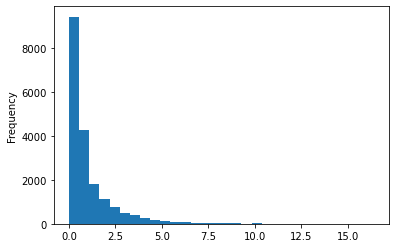

In [22]:
# Look at variance of gene expression
dataset.expression.var().plot(kind='hist', bins=30)

In [119]:
dataset[0]

{'name': '22RV1_PROSTATE',
 'tissue': 'prostate',
 'drug_name': "N'-(2-pyrrolylidenemethyl)-2-(2,4,6-trichlorophenoxy)acetohydrazide",
 'drug_encoding': 'C1=CC(=CNNC(=O)COC2=C(C=C(C=C2Cl)Cl)Cl)N=C1',
 'mutation': tensor([0., 1., 0.,  ..., 0., 0., 0.]),
 'expression': tensor([1.7225, 3.2001, 2.0000,  ..., 4.3420, 3.8748, 5.0206])}

### Convert SMILES encoding to Morgan footprint

In [25]:
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs

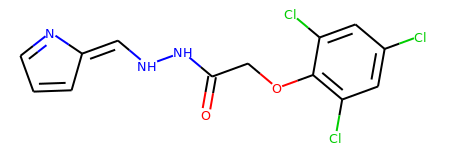

In [26]:
# Convert from SMILE
mol = AllChem.MolFromSmiles("c1nn(Cc2ccccc2)cc1-c3ccccc3")
mol = AllChem.MolFromSmiles("C1=CC(=CNNC(=O)COC2=C(C=C(C=C2Cl)Cl)Cl)N=C1")
mol

In [28]:
# Generate a Morgan fingerprint with radius 2 of 2048 bits for each
mol_morgan = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
mol_morgan

In [29]:
arr = np.zeros((0, ), dtype=np.int8)
DataStructs.ConvertToNumpyArray(mol_morgan, arr)
arr

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [30]:
s = mol_morgan.ToBitString()
s

'000000000000000000000000000000000000000001000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000100000000000000000000000100000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000100000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000100000000100000000000000000000000000000000000000000000000000000001000000000000000000000000000001001000000000000000000000000000000000000000000011000000000000000000000000000000000000000000000000010000000100000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000010000000000001000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [31]:
torch.Tensor([int(i) for i in list(s)])

tensor([0., 0., 0.,  ..., 1., 0., 0.])

## MultiomicDatasetICB Class

In [17]:
NIVO="/cellar/users/aklie/projects/hackathons/multiomic_drug_response/icb_files/nivo2fingerprint.txt"

In [21]:
from MultiomicDatasetICB import MultiomicDataset

In [22]:
TRAINING_DATA = "../data/training_top2000"
ICB_DATA = "../data/icb_top2000"

In [25]:
multiomic_dataset = MultiomicDataset(file_ext=ICB_DATA, drug=True, expression=True, cn=True, mutation=True, drug_encoding=NIVO)
multiomic_dataset[0]

SRR10801753


{'drug_encoding': tensor([0., 1., 0.,  ..., 0., 0., 0.]),
 'auc': tensor([0.]),
 'mutation': tensor([-0.4887,  1.2033,  1.2969,  ...,  1.0362,  0.9562,  0.3896]),
 'expression': tensor([ 1.2948,  3.9648, -0.2197,  ..., -0.4619,  0.3830, -0.2890]),
 'cn': tensor([-2.2157e+00,  5.2996e-16,  4.1017e-16,  ..., -5.7684e-16,
         -2.4352e-01, -3.8524e-01])}

In [26]:
multiomic_dataset = MultiomicDataset(file_ext=TRAINING_DATA, drug=True, expression=True, cn=True, mutation=True)
multiomic_dataset[0]

22RV1_PROSTATE


{'drug_encoding': tensor([0., 0., 0.,  ..., 1., 0., 0.]),
 'auc': tensor([0.9379]),
 'mutation': tensor([0., 1., 0.,  ..., 1., 0., 0.]),
 'expression': tensor([-0.5835,  0.7558, -1.1796,  ...,  0.5188,  0.7927, -0.4353]),
 'cn': tensor([-0.2067,  0.2854,  0.0538,  ...,  0.3273,  0.0456, -0.1520])}